# 統計-stats

SciPyの`stats`モジュールには、さまざまな確率分布の確率変数（確率変数は確率論の概念であり、Pythonの変数ではありません）が含まれています。確率変数は連続と離散の2種類に分けられます。すべての連続確率変数は`rv_continuous`の派生クラスのオブジェクトであり、すべての離散確率変数は`rv_discrete`の派生クラスのオブジェクトです。

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import helper.matplotlib
import helper.magics
from scipy import stats

## 連続確率分布

`stats`モジュール内のすべての連続確率変数を取得するには、以下のステートメントを使用できます：

In [5]:
from scipy import stats
%col 4 [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['ksone',                 'kstwo',                 'kstwobign',             'norm',                 
 'alpha',                 'anglit',                'arcsine',               'beta',                 
 'betaprime',             'bradford',              'burr',                  'burr12',               
 'fisk',                  'cauchy',                'chi',                   'chi2',                 
 'cosine',                'dgamma',                'dweibull',              'expon',                
 'exponnorm',             'exponweib',             'exponpow',              'fatiguelife',          
 'foldcauchy',            'f',                     'foldnorm',              'weibull_min',          
 'truncweibull_min',      'weibull_max',           'genlogistic',           'genpareto',            
 'genexpon',              'genextreme',            'gamma',                 'erlang',               
 'gengamma',              'genhalflogistic',       'genhyperbolic',         'gompertz',    

連続確率変数オブジェクトには以下のメソッドがあります：

* `rvs`：確率変数からランダムに値を取得します。`size`パラメータを使用して出力配列のサイズを指定できます。
* `pdf`：確率変数の確率密度関数。
* `cdf`：確率変数の累積分布関数。これは確率密度関数の積分です。
* `sf`：確率変数の生存関数。その値は`1 - cdf(t)`です。
* `ppf`：累積分布関数の逆関数。
* `stat`：確率変数の期待値と分散を計算します。
* `fit`：ランダムサンプルのセットをフィットさせ、サンプルデータに最も適した確率密度関数の係数を見つけます。

以下では、正規分布を例として、確率変数の使用方法を簡単に紹介します。以下のステートメントは、デフォルトの正規分布の確率変数の期待値と分散を取得します。デフォルトでは、平均が0、分散が1の確率変数であることがわかります：

In [6]:
stats.norm.stats()

(0.0, 1.0)

`norm`は関数のように呼び出すことができ、`loc`と`scale`パラメータを使用して確率変数のオフセットとスケールパラメータを指定できます。正規分布の確率変数では、これらのパラメータは期待値と標準偏差を指定するのと同じです。標準偏差は分散の平方根であるため、標準偏差が2の場合、分散は4になります：

In [7]:
X = stats.norm(loc=1.0, scale=2.0)
X.stats()

(1.0, 4.0)

以下では、確率変数`X`の`rvs()`メソッドを呼び出して、1万回のランダムサンプル値を含む配列`x`を取得し、NumPyの`mean()`と`var()`を呼び出してこの配列の平均と分散を計算します。その結果は確率変数`X`の特性に一致します：

In [8]:
x = X.rvs(size=10000) # 確率変数から10000個の値を取得
np.mean(x), np.var(x) # 期待値と分散

(1.013548762159802, 4.021908966929534)

また、`fit()`メソッドを使用してシーケンス`x`をフィットさせることができます。これは`x`に最も適合する確率変数のパラメータを返します：

In [9]:
stats.norm.fit(x) # ランダムシーケンスの期待値と標準偏差を取得

(1.013548762159802, 2.0054697621578677)

以下の例では、ランダム配列`x`のヒストグラム統計と累積分布を計算し、確率変数の確率密度関数と累積分布関数と比較します。

❶`histogram()`は配列`x`のヒストグラム統計を行います。配列`x`の値の範囲を100の区間に分割し、`x`の各値が各区間に含まれる回数を統計します。`histogram()`は2つの配列`pdf`と`t`を返します。`pdf`は各区間のサンプル値の頻度を表します。`density`パラメータが`True`であるため、`pdf`の値は正規化された結果であり、その結果は確率変数の確率密度関数と一致するはずです。

❷`t`は区間を表します。区間の開始点と終了点が含まれるため、`t`の長さは101です。各区間の中間値を計算し、`X.pdf(t)`と`X.cdf(t)`を呼び出して確率変数の確率密度関数と累積分布関数の値を計算し、統計値と比較します。❸サンプルの累積分布を計算する場合、区間のサイズを乗算する必要があります。これにより、その結果が累積分布関数と同じになります。

In [10]:
pdf, t = np.histogram(x, bins=100, density=True)  #❶
t = (t[:-1] + t[1:]) * 0.5 #❷
cdf = np.cumsum(pdf) * (t[1] - t[0]) #❸
p_error = pdf - X.pdf(t)
c_error = cdf - X.cdf(t)
print("max pdf error: {:6.3f}, max cdf error: {:6.3f}".format(
    np.abs(p_error).max(), np.abs(c_error).max()))

max pdf error:  0.020, max cdf error:  0.018


次のグラフ（左）は確率密度関数とヒストグラム統計の結果を示しています。これらが一致していることがわかります。右図は確率変数`X`の累積分布関数と配列`pdf`の累積結果を示しています。

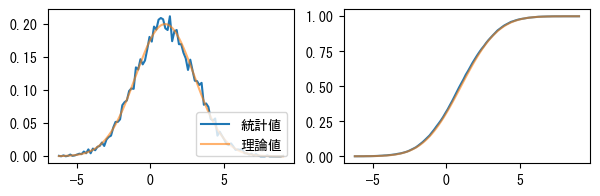

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))
ax1.plot(t, pdf, label="統計値")
ax1.plot(t, X.pdf(t), label="理論値", alpha=0.6)
ax1.legend(loc="lower right")
ax2.plot(t, cdf)
ax2.plot(t, X.cdf(t), alpha=0.6);

一部の確率分布では、`loc`と`scale`パラメータに加えて、追加の形状パラメータが必要です。例えば、ガンマ分布は$k$個の独立したランダムイベントが発生するまでの時間を記述するために使用できます。$k$はガンマ分布の形状パラメータです。以下では、形状パラメータ$k$が1と2の場合のガンマ分布の期待値と分散を計算します：

In [12]:
print(stats.gamma.stats(1.0))
print(stats.gamma.stats(2.0))

(1.0, 1.0)
(2.0, 2.0)


ガンマ分布の尺度パラメータ$\theta$はランダムイベントの発生頻度に関連し、`scale`パラメータで指定されます：

In [13]:
stats.gamma.stats(2.0, scale=2)

(4.0, 8.0)

ガンマ分布の数学的定義によると、その期待値は$k \theta$、分散は$k \theta^2$です。上記のプログラムはこれらの式を検証しています。

確率分布に追加の形状パラメータがある場合、それに対応する`rvs()`、`pdf()`などのメソッドは、形状パラメータを受け取るために追加のパラメータを持ちます。例えば、以下のプログラムは`rvs()`を呼び出して、$k=2$、$\theta=2$のガンマ分布から4つのランダム値を取得します：

In [14]:
x = stats.gamma.rvs(2, scale=2, size=4)
x

array([2.88766901, 0.86678737, 7.7823693 , 2.67606208])

次に、`pdf()`を呼び出して、上記の4つのランダム値に対応する確率密度を確認します：

In [15]:
stats.gamma.pdf(x, 2, scale=2)

array([0.17038763, 0.14048569, 0.03973121, 0.17552408])

また、形状パラメータと尺度パラメータを固定した確率変数を作成し、その`pdf()`を呼び出して確率密度を計算することもできます：

In [16]:
X = stats.gamma(2, scale=2) 
X.pdf(x)

array([0.17038763, 0.14048569, 0.03973121, 0.17552408])

## 離散確率分布

分布関数の値域が離散的である場合、それを離散確率分布と呼びます。例えば、6面のサイコロを振ると、1から6の整数しか得られないため、得られる確率分布は離散的です。離散確率分布では、通常、確率質量関数（PMF）を使用してその分布を記述します。
    
`stats`モジュールでは、すべての離散分布を記述する確率変数は`rv_discrete`クラスから継承されます。また、`rv_discrete`クラスを使用して離散確率分布をカスタマイズすることもできます。例えば、不均一なサイコロがあり、各面が出る確率が等しくないとします。以下の配列`x`を使用してサイコロのすべての可能な値を保存し、配列`p`を使用して各値が出る確率を保存できます：

In [17]:
x = list(range(1, 7))
p = [0.4, 0.2, 0.1, 0.1, 0.1, 0.1]

次に、この特殊なサイコロを表す確率変数`dice`を作成し、その`rvs()`メソッドを呼び出してこのサイコロを20回振り、確率`p`に従ったランダム数を取得します：

In [18]:
dice = stats.rv_discrete(values=(x, p))
dice.rvs(size=20)

array([1, 3, 2, 1, 3, 4, 1, 1, 1, 4, 5, 2, 1, 4, 2, 4, 4, 1, 5, 1])

以下では、確率論の中心極限定理をプログラムで検証します：多数の独立した確率変数の平均値の分布は、正規分布に収束します。上記の特殊なサイコロを50回振った平均値を計算します。各サイコロの出目は独立したランダムイベントと見なせるため、50回振った平均値は「多数の独立した確率変数」と見なせ、その平均値の分布は正規分布に非常に近いはずです。`rvs()`を使用してサンプル値を取得し、その結果は形状が`(20000, 50)`の配列です。最初の軸に沿って各行の平均値を計算し、`samples_mean`を取得します：

In [19]:
np.random.seed(42)
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis=1)

## カーネル密度推定

上記の例では、各サンプルは離散的であるため、その平均値も離散的です。このようなデータに対してヒストグラム統計を行うと、多くの離散点が同じ区間に集まる現象が発生しやすくなります。サンプルの確率密度をより滑らかに表示するために、`kde.gaussian_kde()`を使用してカーネル密度推定を行うことができます。次のグラフでは、ヒストグラム統計の結果には大きな変動がありますが、カーネル密度推定はフィットした正規分布に非常に近いため、中心極限定理が検証されています。

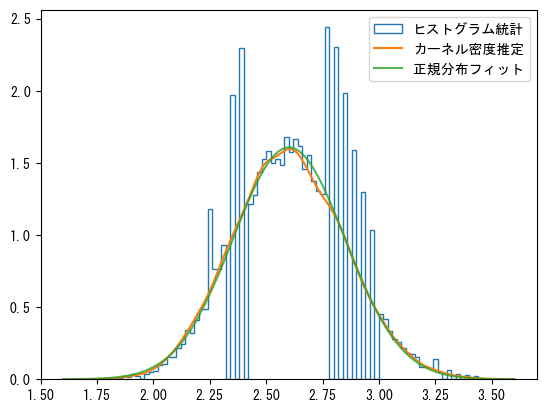

In [21]:
from scipy.stats import gaussian_kde

_, bins, step = plt.hist(
    samples_mean, bins=100, density=True, histtype="step", label="ヒストグラム統計")
kde = gaussian_kde(samples_mean)
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, kde(x), label="カーネル密度推定")
mean, std = stats.norm.fit(samples_mean)
plt.plot(x, stats.norm(mean, std).pdf(x), alpha=0.8, label="正規分布フィット")
plt.legend();

カーネル密度推定アルゴリズムは、各データポイントにカーネル関数曲線を配置し、最終的なカーネル密度推定はこれらのカーネル関数曲線の重ね合わせです。`gaussian_kde()`のカーネル関数はガウス曲線であり、その`bw_method`パラメータはカーネル関数の幅、つまりガウス曲線の分散を決定します。`bw_method`パラメータは以下のいずれかです：

* 'scott'と'silverman'の場合、データの数と次元に基づいてカーネル関数の幅係数を決定するための対応する式を使用します。
* 関数の場合、この関数を呼び出して曲線幅係数を計算します。関数のパラメータは`gaussian_kde`オブジェクトです。
* 数値の場合、この数値を直接幅係数として使用します。

次のグラフは、幅係数がカーネル密度推定に与える影響を比較しています。図中の曲線は、`[-1, 0, 1]`の3つのデータポイントに対してカーネル密度推定を行っています。幅係数が大きいほど、カーネル密度推定曲線は滑らかになります。幅係数が小さい場合、3つのデータポイントでのガウス曲線のピークが見えますが、幅が大きくなるにつれて、これらのピークは1つの統一されたピークに統合されます。

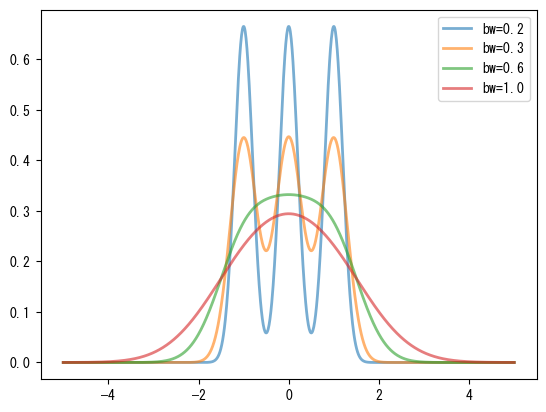

In [22]:
for bw in [0.2, 0.3, 0.6, 1.0]:
    kde = stats.gaussian_kde([-1, 0, 1], bw_method=bw)
    x = np.linspace(-5, 5, 1000)
    y = kde(x)
    plt.plot(x, y, lw=2, label="bw={}".format(bw), alpha=0.6)
plt.legend(loc="best");

## 二項分布、ポアソン分布、ガンマ分布

このセクションでは、確率論の二項分布、ポアソン分布、およびガンマ分布について、いくつかのサンプルプログラムを使用して実験と議論を行います。

二項分布は最も重要な離散確率分布の1つです。2つの結果しかない実験があり、その成功確率が$p$であるとします。二項分布は、$n$回の独立した実験を行い、$k$回成功する確率を記述します。二項分布の確率質量関数の式は以下の通りです：

$$f(k;n,p) = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k}$$

例えば、二項分布の確率質量関数を使用して、5回サイコロを振り、3回6が出る確率を計算できます。サイコロを1回振り、6が出る確率（つまり実験の成功確率）は$p=1/6$で、実験回数は$n=5$です。二項分布の確率質量関数`pmf()`を使用すると、$k$回6が出る確率を簡単に計算できます。確率密度関数`pdf()`と同様に、`pmf()`の最初のパラメータは確率変数の値であり、後のパラメータは確率分布を記述するために必要なパラメータです。二項分布の場合、パラメータは$n$と$p$であり、値の範囲は0から$n$までの整数です。以下のプログラムは、$k$が0から5の場合の確率を計算します：

In [23]:
stats.binom.pmf(range(6), 5, 1/6.0)

array([4.01877572e-01, 4.01877572e-01, 1.60751029e-01, 3.21502058e-02,
       3.21502058e-03, 1.28600823e-04])

結果から、0回または1回6が出る確率は40.2％であり、3回6が出る確率は3.215％であることがわかります。

二項分布では、実験回数$n$が大きく、各実験の成功確率$p$が小さい場合、積$n p$が適度であると、実験の成功回数の確率はポアソン分布で近似できます。

ポアソン分布では、$\lambda$を使用して単位時間（または単位面積）内のランダムイベントの平均発生率を記述します。二項分布の実験回数$n$を単位時間内に行われる実験回数と見なすと、イベントの発生確率$p$との積がイベントの平均発生率$\lambda$、つまり$\lambda=n \cdot p$になります。ポアソン分布の確率質量関数の式は以下の通りです：
    
$$f(k;\lambda)=\frac{e^{-\lambda}\lambda^k}{k!}$$

以下のプログラムは、二項分布とポアソン分布の確率質量関数をそれぞれ計算し、その結果を次のグラフに示します。$n$が十分に大きい場合、これらは非常に近いことがわかります。プログラム中のイベントの平均発生率$\lambda$は常に10です。二項分布の実験回数$n$に基づいて、各イベントの発生確率$p=\lambda/n$を計算します。

max err1=0.006755 max err2=0.000630


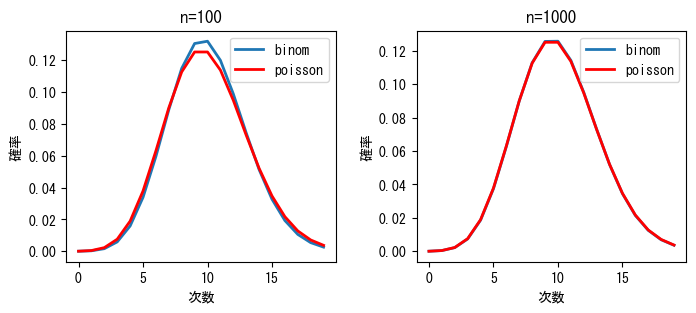

In [24]:
lambda_ = 10.0
x = np.arange(20)

n1, n2 = 100, 1000

y_binom_n1 = stats.binom.pmf(x, n1, lambda_ / n1)
y_binom_n2 = stats.binom.pmf(x, n2, lambda_ / n2)
y_poisson = stats.poisson.pmf(x, lambda_)
print("max err1={:8.6f} max err2={:8.6f}".format(
    np.max(np.abs(y_binom_n1 - y_poisson)),
    np.max(np.abs(y_binom_n2 - y_poisson))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, y_binom_n1, label=u"binom", lw=2)
ax1.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
ax2.plot(x, y_binom_n2, label=u"binom", lw=2)
ax2.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
for n, ax in zip((n1, n2), (ax1, ax2)):
    ax.set_xlabel("次数")
    ax.set_ylabel("確率")
    ax.set_title("n={}".format(n))
    ax.legend()
fig.subplots_adjust(wspace=0.3);

ポアソン分布は、単位時間内にランダムな事象が発生する回数の分布を記述するのに適しています。例えば、ある施設の一定時間内の使用回数、機械の故障回数、自然災害の発生回数などです。

読者がポアソン分布の概念をより深く理解するために、以下では乱数を使ってポアソン分布をシミュレーションし、確率質量関数と比較します。結果は次のグラフに示されています。図では、1秒あたりの事象の平均発生回数は10、つまり$\lambda=10$です。左図の観測時間は1000秒、右図の観測時間は50000秒です。観測時間が長くなるほど、1秒あたりの事象発生回数はポアソン分布に近づくことがわかります。

time=1000, max_error= 0.020
time=50000, max_error= 0.002


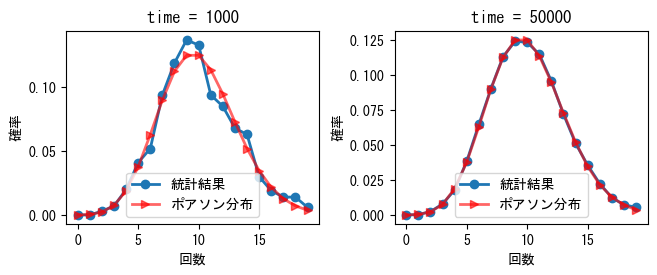

In [25]:
np.random.seed(42)

def sim_poisson(lambda_, time):
    t = np.random.uniform(0, time, size=lambda_ * time) #❶
    count, time_edges = np.histogram(t, bins=time, range=(0, time))  #❷
    dist, count_edges = np.histogram(count, bins=20, range=(0, 20), density=True) #❸
    x = count_edges[:-1]
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist

lambda_ = 10      
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])
max_error1 = np.max(np.abs(dist1 - poisson1))
max_error2 = np.max(np.abs(dist2 - poisson2))         
print("time={}, max_error={:6.3f}".format(times[0], max_error1))
print("time={}, max_error={:6.3f}".format(times[1], max_error2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1, "-o", lw=2, label=u"統計結果")
ax1.plot(x1, poisson1, "->", lw=2, label=u"ポアソン分布", color="red", alpha=0.6)
ax2.plot(x2, dist2, "-o", lw=2, label=u"統計結果")
ax2.plot(x2, poisson2, "->", lw=2, label=u"ポアソン分布", color="red", alpha=0.6)

for ax, time in zip((ax1, ax2), times):
    ax.set_xlabel(u"回数")
    ax.set_ylabel(u"確率")
    ax.set_title(u"time = {}".format(time))
    ax.legend(loc="lower center")
    
fig.subplots_adjust(wspace=0.3);

❶NumPyの乱数生成関数`uniform()`を使って、0から`time`までの間に均等に分布する`lambda_*time`個の事象の発生時刻を生成します。❷`histogram()`を使って、配列`t`中の1秒あたりの事象発生回数`count`を統計します。ポアソン分布の定義によれば、`count`配列の値の分布はポアソン分布に従うはずです。❸次に、事象回数が0から20の範囲内の確率分布を統計します。`histogram()`の`density`パラメータが`True`の場合、結果は確率質量関数と等しくなります。

ランダムな事象の分布問題を別の角度から見ることもできます。隣接する2つの事象間の時間間隔の分布、または$k$個の事象間の時間間隔の分布を観察することができます。確率論によれば、事象間の時間間隔はガンマ分布に従うべきであり、時間間隔は任意の値を取ることができるため、ガンマ分布は連続確率分布です。ガンマ分布の確率密度関数の式は以下の通りで、$k$番目の事象が発生するまでの待ち時間の確率分布を記述します。$\Gamma(k)$はガンマ関数で、$k$が整数の場合、その値は$k$の階乗$k!$と等しくなります。

$$f(X;k, \lambda)=\frac{X^{(k-1)}\lambda^{k} e^{(-\lambda X)}}{\Gamma(k)}$$

以下のプログラムは、事象の時間間隔のガンマ分布をシミュレーションし、結果を次のグラフに示します。図中の観測時間は1000秒で、平均して1秒あたり10個の事象が発生します。左図では$k=1$で、隣接する2つの事象間の間隔の分布を示し、$k=2$では1つ離れた2つの事象間の間隔の分布を示しています。どちらもガンマ分布に従っていることがわかります。

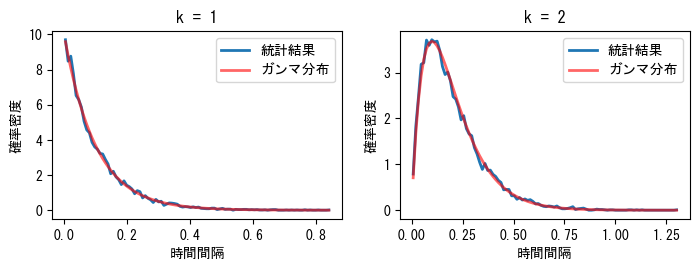

In [26]:
def sim_gamma(lambda_, time, k):
    t = np.random.uniform(0, time, size=lambda_ * time) #❶
    t.sort()  #❷
    interval = t[k:] - t[:-k] #❸
    dist, interval_edges = np.histogram(interval, bins=100, density=True) #❹
    x = (interval_edges[1:] + interval_edges[:-1])/2  #❺
    gamma = stats.gamma.pdf(x, k, scale=1.0/lambda_) #❺
    return x, gamma, dist

lambda_ = 10.0
time = 1000
ks = 1, 2
x1, gamma1, dist1 = sim_gamma(int(lambda_), time, ks[0])
x2, gamma2, dist2 = sim_gamma(int(lambda_), time, ks[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1,  lw=2, label=u"統計結果")
ax1.plot(x1, gamma1, lw=2, label=u"ガンマ分布", color="red", alpha=0.6)
ax2.plot(x2, dist2,  lw=2, label=u"統計結果")
ax2.plot(x2, gamma2, lw=2, label=u"ガンマ分布", color="red", alpha=0.6)

for ax, k in zip((ax1, ax2), ks):
    ax.set_xlabel(u"時間間隔")
    ax.set_ylabel(u"確率密度")
    ax.set_title(u"k = {}".format(k))
    ax.legend(loc="upper right")
    
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1);

❶まず、1000秒の間に10000個のランダムな事象の発生時刻を生成します。したがって、事象の平均発生回数は1秒あたり10回です。❷事象の前後の時間間隔を計算するために、まずランダムな時刻をソートします。❸次に、`k`個の事象間の時間間隔を計算します。❹この時間間隔に対して`histogram()`を呼び出して確率統計を行い、`density`を`True`に設定すると確率密度を直接計算できます。`histogram()`が返す2番目の値は統計区間の境界です。❺次に、`gamma.pdf()`を使ってガンマ分布の確率密度を計算する際に、各区間の中間値を使用します。`pdf()`の2番目のパラメータは`k`値で、`scale`パラメータは$1/\lambda$です。

次に、ガンマ分布に関する確率問題を見てみましょう。AとBの2つのバスがあり、それぞれの平均発車間隔は5分と10分です。ある乗客が駅Sでどちらかのバスをランダムに選んで乗車するとします。AとBがSに到着する時刻は確定できないと仮定し、この乗客の平均待ち時間を計算します。

「AとBがSに到着する時刻は確定できない」という仮定は、バスがS駅に到着する時刻が完全にランダムであることを意味します。したがって、単位時間内にS駅に到着するバスの回数はポアソン分布に従い、前後のバスの時間差は$k=1$のガンマ分布に従います。以下では、まず乱数シミュレーションを使って近似解を求め、その後、解の公式を導出します。

In [27]:
T = 100000
A_count = T // 5
B_count = T // 10

A_time = np.random.uniform(0, T, A_count) #❶
B_time = np.random.uniform(0, T, B_count)

bus_time = np.concatenate((A_time, B_time)) #❷
bus_time.sort()

N = 200000
passenger_time = np.random.uniform(bus_time[0], bus_time[-1], N) #❸

idx = np.searchsorted(bus_time, passenger_time) #❹
np.mean(bus_time[idx] - passenger_time) * 60    #❺

202.3388747879705

シミュレーションの総時間は`T`分で、この間に`A_count`回のA路線バスと`B_count`回のB路線バスが`S`駅に到着します。❶均一分布`uniform()`を使って、2路線のバスがS駅に到着する時刻を生成します。❷これらの時刻を保存する配列を結合し、ソートします。

❸最初と最後のバスの到着時刻の間に、乗客がランダムにS駅に到着する時刻の配列を生成します。❹ソートされたバスの到着時刻配列`bus_time`の中で、各乗客の到着時刻が含まれるインデックスの配列`idx`を二分探索で求めます。❺`bus_time[idx]`は乗客が駅に到着した後に最初に到着するバスの時刻なので、その差を計算して平均を求めます。乱数シミュレーションによる平均待ち時間は約200秒です。

AとBの2路線のバスを一緒に考えると、前後のバスの平均間隔も200秒です。これは直感的には少し不思議に思えるかもしれません。直感的には、平均間隔よりも短い待ち時間を期待するかもしれません。

In [28]:
np.mean(np.diff(bus_time)) * 60

199.99833251643057

これは観測者バイアスによるもので、時間間隔が長い期間に多くの乗客が現れるためです。バスが事故で大幅に遅れた場合、通常は駅に待っている人が多くいることを想像できます。次のグラフ（上）では、青い縦線がバスの到着時刻を表し、赤い縦線が乗客の到着時刻を表しています。2本の青い縦線の間隔が大きいほど、その間に現れる赤い縦線も多くなることがわかります。次のグラフ（下）の横軸は前後のバスの時間差で、縦軸はその時間差内の待ち人数です。これらが比例関係にあることがわかります。

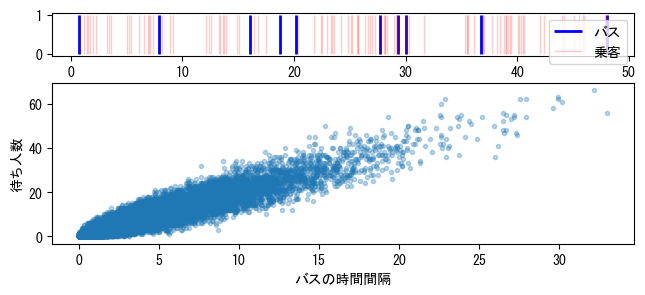

In [29]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(7.5, 3))

G = gridspec.GridSpec(10, 1)
ax1 = plt.subplot(G[:2,  0])
ax2 = plt.subplot(G[3:, 0])

ax1.vlines(bus_time[:10], 0, 1, lw=2, color="blue", label="バス")
ptime = np.random.uniform(bus_time[0], bus_time[9], 100)
ax1.vlines(ptime, 0, 1, lw=1, color="red", alpha=0.2, label="乗客")
ax1.legend()
count, bins = np.histogram(passenger_time, bins=bus_time)
ax2.plot(np.diff(bins), count, ".", alpha=0.3, rasterized=True)
ax2.set_xlabel("バスの時間間隔")
ax2.set_ylabel("待ち人数");

以上の分析から、平均待ち時間を計算する式を以下のように書くことができます：

$$\frac{\int_{0}^{+ \infty }{ \frac{x}{2} x f(x) dx}}{\int_{0}^{+ \infty }{x f(x) dx}}$$

この式では、$x$は2台のバスの間隔時間で、$f(x)dx$は時間間隔が$x$である確率です。観測者効果により、乗客は長時間間隔の期間に現れる確率も高いため、$x f(x)dx$は乗客が時間間隔$x$の期間に現れる確率に比例する量と見なすことができ、分母の積分はこれを正規化します。分子の$\frac{x}{2}$は、その時間間隔の期間に駅に到着するための平均待ち時間です。以下ではこの式を計算します。前のグラフから、バスの間隔はほとんど30分を超えないことがわかります。したがって、式の積分上限は$+\infty$ですが、実際の計算では大きな数を指定するだけで十分です。本章の後続のセクションでは、数値積分`quad()`の使い方について詳しく説明します。

In [30]:
from scipy import integrate
t = 10.0 / 3  # 2台のバスの間の平均時間間隔
bus_interval = stats.gamma(1, scale=t)
n, _ = integrate.quad(lambda x: 0.5 * x * x * bus_interval.pdf(x), 0, 1000)
d, _ = integrate.quad(lambda x: x * bus_interval.pdf(x), 0, 1000)
n / d * 60

200.0

## スチューデントのt分布とt検定

平均値が$\mu$の正規分布から、$n$個の値をサンプリングし、サンプル平均$\bar{x}$とサンプル分散$s$を計算します：

$$\begin{align} \bar{x} = \frac{x_1+\cdots+x_n}{n}, \ \ 
s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 \end{align}$$

このとき、$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$は自由度$df=n-1$のスチューデントのt分布に従います。$t$値はサンプルの平均値と母集団の期待値の差を正規化した値で、サンプルと母集団の間の差異を記述するために使用できます。

以下のプログラムはスチューデントのt分布をシミュレーションします（次のグラフ参照）。❶形状が`(100000, 10)`の正規分布の乱数配列を作成し、❷上の式を使って$t$値を計算し、❸$t$値の分布を統計し、`stats.t`の確率密度関数と比較します。10個の値のサンプルを使って$t$値を計算すると、それは自由度`df=9`のスチューデントのt分布に従うはずです。

max error=0.0068


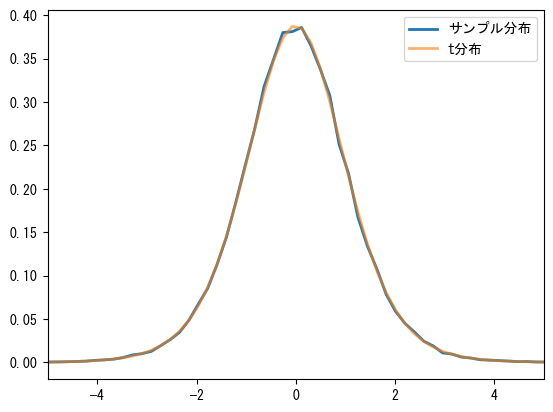

In [31]:
mu = 0.0
n = 10
samples = stats.norm(mu).rvs(size=(100000, n)) #❶
t_samples = (np.mean(samples, axis=1) - mu) / (np.std(samples, ddof=1, axis=1) / n**0.5) #❷
sample_dist, x = np.histogram(t_samples, bins=100, density=True) #❸
x = 0.5 * (x[:-1] + x[1:])
t_dist = stats.t(n-1).pdf(x)
print("max error={:6.4f}".format(np.max(np.abs(sample_dist - t_dist))))

plt.plot(x, sample_dist, lw=2, label=u"サンプル分布")
plt.plot(x, t_dist, lw=2, alpha=0.6, label=u"t分布")
plt.xlim(-5, 5)
plt.legend(loc="best");

次のグラフは`df`が5と39の確率密度関数と生存関数を描画します。`df`が大きくなると、学生t-分布は正規分布に近づきます。

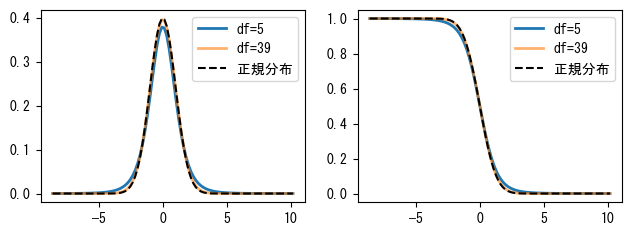

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))
ax1.plot(x, stats.t(6-1).pdf(x), label=u"df=5", lw=2)
ax1.plot(x, stats.t(40-1).pdf(x), label=u"df=39", lw=2, alpha=0.6)
ax1.plot(x, stats.norm.pdf(x), "k--", label=u"正規分布")
ax1.legend()

ax2.plot(x, stats.t(6-1).sf(x), label=u"df=5", lw=2)
ax2.plot(x, stats.t(40-1).sf(x), label=u"df=39", lw=2, alpha=0.6)
ax2.plot(x, stats.norm.sf(x), "k--", label=u"正規分布")
ax2.legend();

学生t-分布はサンプルの平均値を検定するために使用できます。以下では、期待値が1の正規分布から30個の数値を取り出します：

In [33]:
n = 30
np.random.seed(42)
s = stats.norm.rvs(loc=1, scale=0.8, size=n)

全体サンプルの期待値が0.5であるという帰無仮説を立て、`stats.ttest_1samp()`を使用して帰無仮説が棄却できるかどうかを検定します。`stats.ttest_1samp()`が返す最初の値は前述の式で計算された$t$値で、2番目の値は$p$値と呼ばれます。$p$値が0.05未満の場合、通常は帰無仮説が成立しないと見なします。したがって、以下のテストは全体サンプルの期待値が0.5であるという仮説を棄却できることを示しています。

:::{admonition} 帰無仮説
:class: note
統計学において、帰無仮説または無効仮説(null hypothesis)は統計検定を行う際の仮説の一種です。帰無仮説の内容は、通常、誤りであることが証明されることを望む仮説や、特に考慮すべき仮説です。
:::

In [34]:
t = (np.mean(s) - 0.5) / (np.std(s, ddof=1) / np.sqrt(n))
print(t, stats.ttest_1samp(s, 0.5))

2.658584340882224 TtestResult(statistic=2.658584340882224, pvalue=0.01263770225709123, df=29)


以下では期待値が1.0であるかどうかを検定します。$p$値が0.05より大きいため、期待値が1.0であるという帰無仮説を棄却することはできませんが、これはその仮説を受け入れることを意味するわけではありません。なぜなら、期待値が0.9であるという仮説に対応する$p$値も0.05より大きく、1.0の$t$値よりも大きいからです。

In [35]:
print((np.mean(s) - 1) / (np.std(s, ddof=1) / np.sqrt(n)))
print(stats.ttest_1samp(s, 1)) 
print(stats.ttest_1samp(s, 0.9))

-1.1450173670383303
TtestResult(statistic=-1.1450173670383303, pvalue=0.26156414618801477, df=29)
TtestResult(statistic=-0.3842970254542196, pvalue=0.7035619103425202, df=29)


`ttest_1samp()`で計算された$p$値は次のグラフの赤い部分の面積です。$p$値の意味は次のように理解できます：もしランダム変数の期待値が仮定した値と同じである場合、そのランダム変数から$n$個の数値をランダムに抽出したとき、その$t$値がテストサンプルの$t$値よりも極端（絶対値が大きい）である確率が$p$です。したがって、$p$が小さい場合、仮定が成立する可能性が低いと推測できます。逆に、$p$値が大きい場合、帰無仮説を棄却することはできませんが、帰無仮説を棄却できないからといってその仮定を受け入れることができるわけではないことに注意してください。

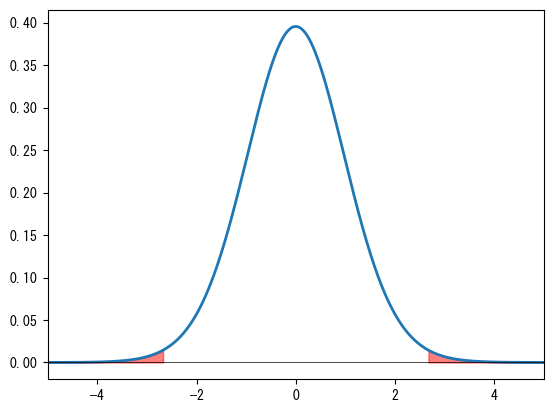

In [36]:
x = np.linspace(-5, 5, 500)
y = stats.t(n-1).pdf(x)
plt.plot(x, y, lw=2)
t, p = stats.ttest_1samp(s, 0.5)
mask = x > np.abs(t)
plt.fill_between(x[mask], y[mask], color="red", alpha=0.5)
mask = x < -np.abs(t)
plt.fill_between(x[mask], y[mask], color="red", alpha=0.5)
plt.axhline(color="k", lw=0.5)
plt.xlim(-5, 5);

上記の期待値が0.5のテストを例にとります：もし全体サンプルの期待値が本当に0.5である場合、$t$値が2.65858より大きいか、または-2.65858より小さいサンプルを抽出する確率は0.0126377です。この確率が非常に小さいため、全体サンプルの期待値は0.5ではないと推測できます。また、次のようにも理解できます：もし全体サンプルの期待値が0.5である場合、`s`よりも極端なサンプルをランダムに抽出する確率は0.0126377です。

以下では`scipy.integrate.trapz()`を使用して$p$値を積分で検証します。左右の赤い部分の面積は等しいため、以下の積分ではそのうちの1つの面積を計算するだけで十分です：

In [40]:
from scipy import integrate
x = np.linspace(-10, 10, 100000)
y = stats.t(n-1).pdf(x)
mask = x >= np.abs(t)
integrate.trapezoid(y[mask], x[mask])*2

0.012633433707685972

以下ではランダム数を使用して前述の$p$値を検証します。`m`組のランダム数を作成し、各組には`n`個の数値が含まれます。次に、全体サンプルの期待値が0.5であると仮定した場合の各組のランダム数に対応する$t$値`tr`を計算します。これは長さ`m`の配列です。`tr`とサンプルの$t$値`ts`を絶対値で比較し、$|t_r| > |t_s|$の場合、その組のランダム数はサンプルよりも極端であると見なします。極端な組が出現する確率を統計し、それが$p$値と同じであることを確認します。

In [41]:
m = 200000
mean = 0.5
r = stats.norm.rvs(loc=mean, scale=0.8, size=(m, n))
ts = (np.mean(s) - mean) / (np.std(s, ddof=1) / np.sqrt(n))
tr = (np.mean(r, axis=1) - mean) / (np.std(r, ddof=1, axis=1) / np.sqrt(n))
np.mean(np.abs(tr) > np.abs(ts))

0.012695

`s1`と`s2`が正規分布の母集団からの独立したサンプルである場合、`ttest_ind()`を使用してこれらの母集団の平均値に差があるかどうかを検定できます。`equal_var`パラメータを使用して、2つの母集団の分散が同じかどうかを指定します。以下の例では、❶`s1`と`s2`のサンプルは異なる分散の母集団から来ているため、`equal_var`パラメータは`False`です。$p < 0.05$であるため、2つの母集団の平均値には差があると見なされます。❷`s2`と`s3`は同じ分散の母集団から来ているため、`equal_var`パラメータは`True`です。得られた$p$値は非常に大きいため、帰無仮説を棄却することはできず、2つの母集団の平均値が同じであるという帰無仮説を否定することはできません。

In [42]:
np.random.seed(42)

s1 = stats.norm.rvs(loc=1, scale=1.0, size=20)
s2 = stats.norm.rvs(loc=1.5, scale=0.5, size=20)
s3 = stats.norm.rvs(loc=1.5, scale=0.5, size=25)

print(stats.ttest_ind(s1, s2, equal_var=False)) #❶
print(stats.ttest_ind(s2, s3, equal_var=True)) #❷

TtestResult(statistic=-2.2391470627176755, pvalue=0.033250866086743665, df=28.072969108063)
TtestResult(statistic=-0.5946698521856172, pvalue=0.5551805875810539, df=43.0)


## カイ二乗分布とカイ二乗検定

カイ二乗分布($\chi ^{2}$)は確率論と統計学でよく使用される確率分布です。$k$個の独立した標準正規分布変数の二乗和は自由度$k$のカイ二乗分布に従います。以下ではランダム数を使用してこの分布を検証し、その結果は次のグラフに示されています：

max error: 0.0034


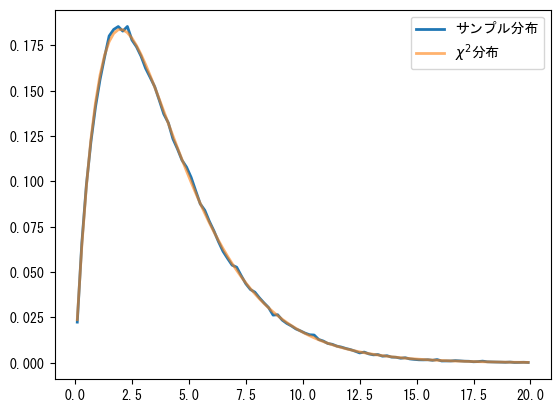

In [47]:
a = np.random.normal(size=(300000, 4))
cs = np.sum(a**2, axis=1)

sample_dist, bins = np.histogram(cs, bins=100, range=(0, 20), density=True)
x = 0.5 * (bins[:-1] + bins[1:])
chi2_dist = stats.chi2.pdf(x, 4) 
print("max error: {:6.4f}".format(np.max(np.abs(sample_dist - chi2_dist))))

plt.plot(x, sample_dist, lw=2, label="サンプル分布")
plt.plot(x, chi2_dist, lw=2, alpha=0.6, label=r"$\chi ^{2}$分布")
plt.legend(loc="best");

カイ二乗分布は次のような確率現象を記述するために使用できます：袋の中に5色のボールがあり、各色のボールが選ばれる確率は同じです。そこから$N$回選び、各色の回数$O_i$を記録します。以下の$\chi^2$は自由度4のカイ二乗分布に従います。ここで$E=N/5$は各色のボールが選ばれる期待回数です：

$$\chi^2 = \sum_{i=1}^{k}{\frac{(O_i-E)^2}{E}}$$

以下ではこの過程をプログラムでシミュレーションし、その結果は次のグラフに示されています。❶まず`randint()`を呼び出して0から5のランダム数を作成します。その結果`ball_ids`の第0軸は実験回数を表し、第1軸は各実験で抽出された100個のボールの番号です。❷`bincount()`を使用して各実験で各番号が出現した回数を記録します。これは多次元配列をサポートしていないため、ここでは`apply_along_axis()`を使用して第1軸のデータに対して`bincount()`をループで呼び出します。各行の統計結果の長さを同じにするために、`minlength`パラメータを5に設定します。`apply_along_axis()`はすべてのキーワード引数を実際の計算を行う関数に渡します。❸上記の式を使用して$\chi^2$統計量cs2を計算し、❹`gaussian_kde()`を使用して`cs2`の分布を計算します。

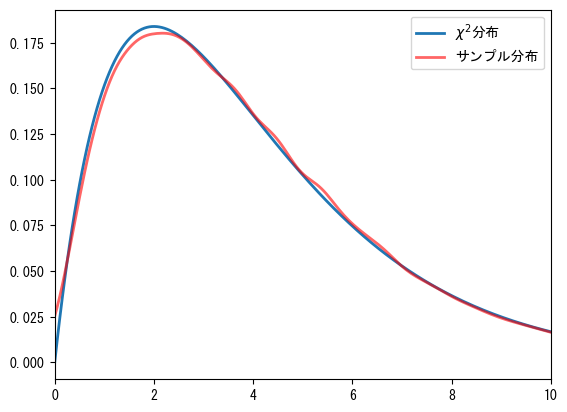

In [48]:
repeat_count = 60000
n, k = 100, 5

np.random.seed(42)
ball_ids = np.random.randint(0, k, size=(repeat_count, n)) #❶
counts = np.apply_along_axis(np.bincount, 1, ball_ids, minlength=k) #❷
cs2 = np.sum((counts - n/k)**2.0/(n/k), axis=1) #❸
k = gaussian_kde(cs2)
x = np.linspace(0, 10, 200)
plt.plot(x, stats.chi2.pdf(x, 4), lw=2, label=r"$\chi ^{2}$分布")
plt.plot(x, k(x), lw=2, color="red", alpha=0.6, label="サンプル分布")
plt.legend(loc="best")
plt.xlim(0, 10);

カイ二乗検定は観測値と理論値の差がランダム誤差によるものかどうかを評価するために使用できます。以下の例では、袋の中の各色のボールは`probabilities`パラメータで指定された確率分布に従います。`choose_balls(probabilities, size)`は袋から`size`回選び、各色のボールが選ばれた回数を返します。袋1のボールの確率分布は`0.18`、`0.24`、`0.25`、`0.16`、`0.17`で、袋2の各色のボールの数は同じです。`choose_balls()`を呼び出して2組の数値`80`、`93`、`97`、`64`、`66`と`89`、`76`、`79`、`71`、`85`を得ます。これら2つの袋のボールが均等に分布しているかどうかを判断する必要があります。

In [49]:
def choose_balls(probabilities, size):
    s = stats.rv_discrete(values=(range(len(probabilities)), probabilities)).rvs(size=size)
    counts = np.bincount(s)    
    return counts

np.random.seed(42)
counts1 = choose_balls([0.18, 0.24, 0.25, 0.16, 0.17], 400)
counts2 = choose_balls([0.2]*5, 400)

%C counts1; counts2

      counts1               counts2       
--------------------  --------------------
[80, 93, 97, 64, 66]  [89, 76, 79, 71, 85]


`chisquare()`を使用してカイ二乗検定を行います。そのパラメータは各色のボールが選ばれた回数のリストです。検定の目標確率が設定されていない場合、それらが均等分布に従うかどうかをテストします。カイ二乗検定の帰無仮説はサンプルが目標確率に従うというものです。以下の検定結果から、最初の袋に対応する$p$値は0.02しかありません。つまり、最初の袋のボールが本当に均等分布に従う場合、私たちの観測結果を得る確率は$2 \%$しかありません。したがって、帰無仮説を棄却できます。つまり、袋の中のボールが均等分布に従う可能性は低いです。2番目の袋に対応する$p$値は0.64で、帰無仮説を棄却することはできません。つまり、私たちの結論は2番目の袋のボールが均等分布に従うことを否定できないということです。前述のt検定と同様に、帰無仮説は否定するためにのみ使用できるため、2番目の袋の観測結果に基づいてそのボールが均等分布に従うと結論付けることはできません。

In [50]:
chi1, p1 = stats.chisquare(counts1)
chi2, p2 = stats.chisquare(counts2)

print("chi1 = {:7.4f} p1 = {:6.4f}".format(chi1, p1))
print("chi1 = {:7.4f} p1 = {:6.4f}".format(chi2, p2))

chi1 = 11.3750 p1 = 0.0227
chi1 =  2.5500 p1 = 0.6357


カイ二乗検定は、カイ二乗分布を用いて計算されます。次のグラフは自由度4のカイ二乗分布の確率密度関数を示しており、`chi1`と`chi2`に対応する位置$\chi_1^2$と$\chi_2^2$を示しています。$p_1$は$\chi_1^2$の右側の面積であり、$p_2$は$\chi_2^2$の右側の面積です。

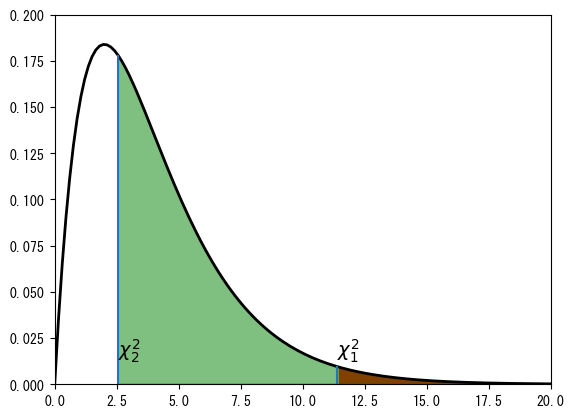

In [51]:
x = np.linspace(0, 30, 200)
CHI2 = stats.chi2(4)
plt.plot(x, CHI2.pdf(x), "k", lw=2)
plt.vlines(chi1, 0, CHI2.pdf(chi1))
plt.vlines(chi2, 0, CHI2.pdf(chi2))
plt.fill_between(x[x>chi1], 0, CHI2.pdf(x[x>chi1]), color="red", alpha=1.0)
plt.fill_between(x[x>chi2], 0, CHI2.pdf(x[x>chi2]), color="green", alpha=0.5)
plt.text(chi1, 0.015, r"$\chi^2_1$", fontsize=14)
plt.text(chi2, 0.015, r"$\chi^2_2$", fontsize=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20);

カイ二乗検定は二次元データにも適用できます。前述の色付きボールの例では、ボールの色でグループ分けしましたが、二次元データではサンプルの2つの属性でグループ分けされ、統計学上ではこれを分割表と呼びます。例えば次のテーブルは性別と利き手の分割表で、この統計結果が性別と利き手の間に何らかの関連性を示すかどうかを知りたいと考えています。

| 　  | 右手  |  左手 |
| :-- | :-- | :-- |
| 男性  | 43  |  9 |
| 女性  | 44  |  4 |

以下では`chi2_contingency()`を使用して分割表に対してカイ二乗検定を行い、性別と利き手の間に関連性がないという帰無仮説を検証します。つまり、男性と女性が左右の手を使う確率が同じであるかどうかを調べます。$p$値が0.3であるため、帰無仮説を棄却できず、この実験データからは男性と女性の利き手の習慣に明確な違いがあるとは言えません。

In [52]:
table = [[43, 9], [44, 4]]
chi2, p, dof, expected = stats.chi2_contingency(table)
%C chi2; p

       chi2                 p        
------------------  -----------------
1.0724852071005921  0.300384770390566


上記の$2 \times 2$の小さな数値の分割表に対しては、`fisher_exact()`を使用して正確な$p$値を計算できます：

In [53]:
stats.fisher_exact(table)

SignificanceResult(statistic=0.43434343434343436, pvalue=0.2391569568222429)